In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import ast
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 14

import seaborn as sns
import cv2
import pandas as pd
import numpy as np

import glob

import numpy as np
from PIL import Image, ImageDraw

from sklearn.preprocessing import LabelEncoder

import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset

In [221]:
def draw_cv2(raw_strokes, size=256, lw=6, time_color=True):
    BASE_SIZE = 299
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for t, stroke in enumerate(eval(raw_strokes)):
        
        str_len = len(stroke[0])
        for i in range(len(stroke[0]) - 1):
            
            if np.random.uniform() > 0.95:
                continue
            
            color = 255 - min(t, 10) * 13 if time_color else 255
            _ = cv2.line(img, (stroke[0][i] + 22, stroke[1][i]  + 22),
                         (stroke[0][i + 1] + 22, stroke[1][i + 1] + 22), color, lw)
    
    if size != BASE_SIZE:
        return cv2.resize(img, (size, size))
    else:
        return img

In [257]:
CLASSES_CSV = glob.glob('../input/train_simplified/*.csv')
CLASSES = [x.split('/')[-1][:-4] for x in CLASSES_CSV]

# 读取单个csv文件
def read_df(path, nrows):
    print('Reading...', path)
    if isinstance(nrows, int):
        return pd.read_csv(path, nrows=nrows, parse_dates=['timestamp'])
    else:
        return pd.read_csv(path, parse_dates=['timestamp'])

# 读取多个csv文件
def contcat_df(paths, nrows):
    dfs = []
    for path in paths:
        dfs.append(read_df(path, nrows))
    return pd.concat(dfs, axis=0, ignore_index=True)

df = contcat_df(CLASSES_CSV, 50000)
df = df.reindex(np.random.permutation(df.index))

('Reading...', '../input/train_simplified/eye.csv')
('Reading...', '../input/train_simplified/castle.csv')
('Reading...', '../input/train_simplified/pizza.csv')
('Reading...', '../input/train_simplified/umbrella.csv')
('Reading...', '../input/train_simplified/bat.csv')
('Reading...', '../input/train_simplified/hot tub.csv')
('Reading...', '../input/train_simplified/diving board.csv')
('Reading...', '../input/train_simplified/wine bottle.csv')
('Reading...', '../input/train_simplified/butterfly.csv')
('Reading...', '../input/train_simplified/bread.csv')
('Reading...', '../input/train_simplified/television.csv')
('Reading...', '../input/train_simplified/peas.csv')
('Reading...', '../input/train_simplified/binoculars.csv')
('Reading...', '../input/train_simplified/basket.csv')
('Reading...', '../input/train_simplified/steak.csv')
('Reading...', '../input/train_simplified/eyeglasses.csv')
('Reading...', '../input/train_simplified/backpack.csv')
('Reading...', '../input/train_simplified/ted

('Reading...', '../input/train_simplified/beard.csv')
('Reading...', '../input/train_simplified/hand.csv')
('Reading...', '../input/train_simplified/moustache.csv')
('Reading...', '../input/train_simplified/screwdriver.csv')
('Reading...', '../input/train_simplified/nose.csv')
('Reading...', '../input/train_simplified/eraser.csv')
('Reading...', '../input/train_simplified/truck.csv')
('Reading...', '../input/train_simplified/sea turtle.csv')
('Reading...', '../input/train_simplified/penguin.csv')
('Reading...', '../input/train_simplified/ant.csv')
('Reading...', '../input/train_simplified/motorbike.csv')
('Reading...', '../input/train_simplified/tree.csv')
('Reading...', '../input/train_simplified/camel.csv')
('Reading...', '../input/train_simplified/toe.csv')
('Reading...', '../input/train_simplified/pillow.csv')
('Reading...', '../input/train_simplified/yoga.csv')
('Reading...', '../input/train_simplified/lantern.csv')
('Reading...', '../input/train_simplified/potato.csv')
('Reading.

('Reading...', '../input/train_simplified/laptop.csv')
('Reading...', '../input/train_simplified/cell phone.csv')
('Reading...', '../input/train_simplified/mug.csv')
('Reading...', '../input/train_simplified/stethoscope.csv')
('Reading...', '../input/train_simplified/guitar.csv')
('Reading...', '../input/train_simplified/tooth.csv')
('Reading...', '../input/train_simplified/square.csv')
('Reading...', '../input/train_simplified/lipstick.csv')
('Reading...', '../input/train_simplified/purse.csv')
('Reading...', '../input/train_simplified/raccoon.csv')
('Reading...', '../input/train_simplified/passport.csv')
('Reading...', '../input/train_simplified/oven.csv')
('Reading...', '../input/train_simplified/book.csv')
('Reading...', '../input/train_simplified/clarinet.csv')
('Reading...', '../input/train_simplified/crayon.csv')
('Reading...', '../input/train_simplified/face.csv')
('Reading...', '../input/train_simplified/church.csv')
('Reading...', '../input/train_simplified/stop sign.csv')
('

In [222]:
img = np.zeros((128, 128, 3))

img[:, :, 0] = draw_cv2(df['drawing'].iloc[1902], 128)
img[:, :, 1] = img[:, :, 0]
img[:, :, 2] = img[:, :, 0]
# img = Image.fromarray(np.uint8(img))

img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [206]:
transform4 = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(),
    transforms.RandomAffine(10, scale=[0.8, 1.05], translate=[0.05, 0.1]),
#     transforms.RandomRotation([-30, 30]),
    transforms.ToTensor(), 
    transforms.ToPILImage(),
    ]
)
img_trans = transform4(img)

In [203]:
np.unique(img_trans.numpy())

array([0.        , 0.00392157, 0.01176471, 0.01960784, 0.02352941,
       0.02745098, 0.03137255, 0.03529412, 0.04705882, 0.05098039,
       0.05490196, 0.05882353, 0.0627451 , 0.07450981, 0.08235294,
       0.08627451, 0.09019608, 0.09411765, 0.09803922, 0.10588235,
       0.10980392, 0.11372549, 0.12156863, 0.1254902 , 0.12941177,
       0.14117648, 0.14509805, 0.14901961, 0.15294118, 0.15686275,
       0.16470589, 0.17254902, 0.1764706 , 0.18039216, 0.18431373,
       0.19215687, 0.2       , 0.20392157, 0.21176471, 0.21960784,
       0.23137255, 0.23921569, 0.24313726, 0.24705882, 0.2509804 ,
       0.25490198, 0.2627451 , 0.27058825, 0.27450982, 0.2784314 ,
       0.28235295, 0.28627452, 0.29411766, 0.29803923, 0.3019608 ,
       0.31764707, 0.32156864, 0.3254902 , 0.32941177, 0.33333334,
       0.3372549 , 0.35686275, 0.3647059 , 0.36862746, 0.37254903,
       0.38039216, 0.38431373, 0.3882353 , 0.39215687, 0.39607844,
       0.4       , 0.40784314, 0.4117647 , 0.41568628, 0.42352

In [35]:
img_border = np.where(img != 0)

In [38]:
img_border[1].max()

119

In [251]:
def grid_distortion(img, num_steps=10, xsteps=[], ysteps=[], interpolation=cv2.INTER_LINEAR,
                    border_mode=cv2.BORDER_REFLECT_101):
    """
    Reference:
        http://pythology.blogspot.sg/2014/03/interpolation-on-regular-distorted-grid.html
    """
    height, width = img.shape[:2]

    x_step = width // num_steps
    xx = np.zeros(width, np.float32)
    prev = 0
    for idx, x in enumerate(range(0, width, x_step)):
        start = x
        end = x + x_step
        if end > width:
            end = width
            cur = width
        else:
            cur = prev + x_step * xsteps[idx]

        xx[start:end] = np.linspace(prev, cur, end - start)
        prev = cur

    y_step = height // num_steps
    yy = np.zeros(height, np.float32)
    prev = 0
    for idx, y in enumerate(range(0, height, y_step)):
        start = y
        end = y + y_step
        if end > height:
            end = height
            cur = height
        else:
            cur = prev + y_step * ysteps[idx]

        yy[start:end] = np.linspace(prev, cur, end - start)
        prev = cur

    map_x, map_y = np.meshgrid(xx, yy)
    map_x = map_x.astype(np.float32)
    map_y = map_y.astype(np.float32)
    img = cv2.remap(img, map_x, map_y, interpolation=interpolation, borderMode=border_mode)
    return img

from scipy.ndimage.filters import gaussian_filter
def elastic_transform_fast(image, alpha, sigma, alpha_affine, interpolation=cv2.INTER_NEAREST,
                           border_mode=cv2.BORDER_REFLECT_101, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_ (with modifications).
    Based on https://gist.github.com/erniejunior/601cdf56d2b424757de5
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
         Convolutional Neural Networks applied to Visual Document Analysis", in
         Proc. of the International Conference on Document Analysis and
         Recognition, 2003.
    """
    if random_state is None:
        random_state = np.random.RandomState()

    height, width = image.shape[:2]

    # Random affine
    center_square = np.float32((height, width)) // 2
    square_size = min((height, width)) // 3
    alpha = float(alpha)
    sigma = float(sigma)
    alpha_affine = float(alpha_affine)

    pts1 = np.float32([center_square + square_size, [center_square[0] + square_size, center_square[1] - square_size],
                       center_square - square_size])
    pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
    matrix = cv2.getAffineTransform(pts1, pts2)

    print(np.unique(image[:, :, 0]))
    image = cv2.warpAffine(image, matrix, (width, height), flags=interpolation, borderMode=border_mode)
    print(np.unique(image[:, :, 0]))
    
    dx = np.float32(gaussian_filter((random_state.rand(height, width) * 2 - 1), sigma) * alpha)
    dy = np.float32(gaussian_filter((random_state.rand(height, width) * 2 - 1), sigma) * alpha)

    x, y = np.meshgrid(np.arange(width), np.arange(height))

    mapx = np.float32(x + dx)
    mapy = np.float32(y + dy)

    return cv2.remap(image, mapx, mapy, interpolation, borderMode=border_mode)

img2 = elastic_transform_fast(img, alpha=1, sigma=30, alpha_affine=30, interpolation=1, border_mode=4)

[  0.   1.   3.   4.   5.   6.   7.   8.   9.  10.  12.  13.  14.  15.
  16.  18.  19.  21.  22.  23.  24.  25.  26.  27.  28.  29.  31.  32.
  33.  35.  36.  37.  38.  39.  40.  42.  44.  45.  46.  47.  49.  51.
  52.  56.  59.  60.  61.  62.  63.  64.  65.  67.  69.  70.  71.  72.
  73.  75.  77.  81.  82.  83.  84.  85.  86.  91.  93.  94.  95.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 108. 110. 112. 113. 114.
 117. 118. 119. 121. 122. 123. 125. 126. 128. 129. 132. 133. 135. 136.
 137. 140. 141. 142. 143. 144. 145. 146. 150. 151. 152. 153. 154. 155.
 156. 160. 162. 164. 165. 167. 168. 172. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 190. 191. 192. 193. 194. 196. 197. 199.
 200. 201. 202. 203. 205. 206. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 221. 222. 223. 224. 225. 226. 228. 229. 231. 232.
 233. 235. 236. 238. 241. 242. 244. 245. 246. 248. 251. 253. 255.]
[0.00000000e+00 8.20312500e-02 9.76562500e-02 ... 2.54384766e+02
 2.54937500e+02 

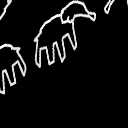

In [252]:
Image.fromarray(np.uint8(img2))

In [169]:
np.unique(img2[:, :, 0])

array([0.00000000e+00, 1.26953125e-02, 2.92968750e-02, ...,
       2.54197266e+02, 2.54656250e+02, 2.55000000e+02])

In [171]:
np.random.uniform()

0.6969660210932113

In [256]:
df[df['key_id'] == 5296310389309440]

,countrycode,drawing,key_id,recognized,timestamp,word
151378,SE,"[[[6, 0, 0, 5, 26, 39, 74, 129, 157, 205, 226,...",5296310389309440,True,2017-03-23 12:35:49.773920,purse
